In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('gene_expression.csv')

In [4]:
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


<AxesSubplot:xlabel='Gene One', ylabel='Gene Two'>

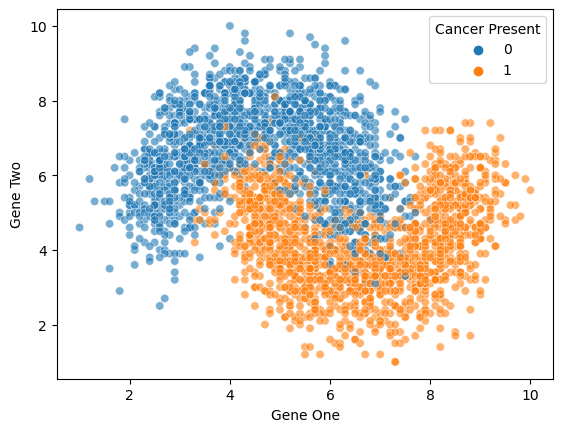

In [9]:
sns.scatterplot(data=df, x='Gene One', y='Gene Two', hue='Cancer Present', alpha=0.6)

In [8]:
len(df)

3000

(4.0, 8.0)

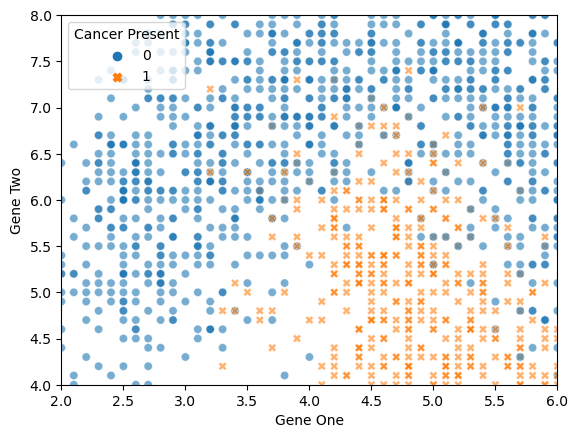

In [13]:
sns.scatterplot(data=df, x='Gene One', y='Gene Two', hue='Cancer Present', alpha=0.6, style = 'Cancer Present')
plt.xlim(2,6)
plt.ylim(4,8)

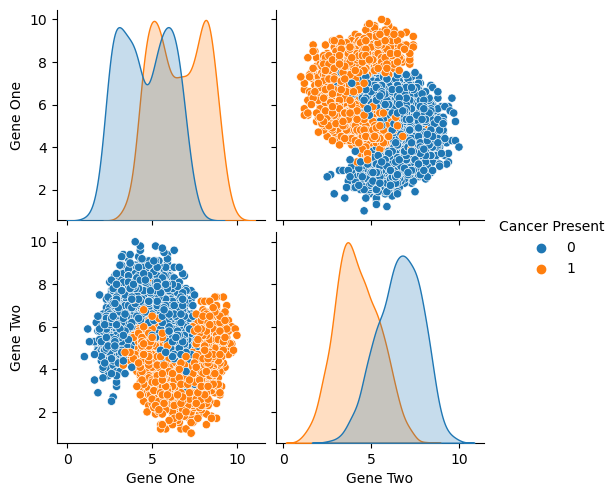

In [14]:
sns.pairplot(data=df, hue='Cancer Present')

In [15]:
from sklearn.model_selection import train_test_split

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
X = df.drop('Cancer Present', axis = 1)

In [19]:
y= df['Cancer Present']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [21]:
scaler = StandardScaler()

In [22]:
scaled_X_train = scaler.fit_transform(X_train)

In [23]:
scaled_X_test = scaler.transform(X_test)

In [24]:
from sklearn.neighbors import KNeighborsClassifier

In [25]:
knn_model = KNeighborsClassifier(n_neighbors=1)

In [27]:
knn_model.fit(scaled_X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [28]:
y_pred = knn_model.predict(scaled_X_test)

In [30]:
from sklearn.metrics import confusion_matrix, classification_report

In [31]:
confusion_matrix(y_test,y_pred)

array([[420,  50],
       [ 47, 383]], dtype=int64)

In [33]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.89      0.90       470
           1       0.88      0.89      0.89       430

    accuracy                           0.89       900
   macro avg       0.89      0.89      0.89       900
weighted avg       0.89      0.89      0.89       900



In [35]:
from sklearn.metrics import accuracy_score

In [36]:
accuracy_score(y_test, y_pred)

0.8922222222222222

In [45]:
test_error_rates = []

for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(scaled_X_train, y_train)
    
    y_pred_test = knn_model.predict(scaled_X_test)
    
    test_error = 1-accuracy_score(y_test, y_pred_test)
    
    test_error_rates.append(test_error)
    

In [46]:
test_error_rates

[0.10777777777777775,
 0.09999999999999998,
 0.07444444444444442,
 0.07666666666666666,
 0.07222222222222219,
 0.06444444444444442,
 0.06444444444444442,
 0.06222222222222218,
 0.06000000000000005,
 0.06222222222222218,
 0.06222222222222218,
 0.06000000000000005,
 0.06222222222222218,
 0.06222222222222218,
 0.06000000000000005,
 0.05666666666666664,
 0.05555555555555558,
 0.05555555555555558,
 0.053333333333333344,
 0.053333333333333344,
 0.054444444444444406,
 0.05111111111111111,
 0.054444444444444406,
 0.054444444444444406,
 0.05666666666666664,
 0.05666666666666664,
 0.05555555555555558,
 0.05777777777777782,
 0.05777777777777782]

Text(0.5, 0, 'K Value')

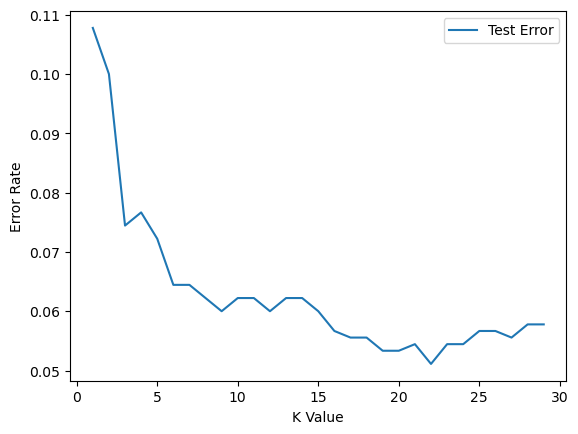

In [47]:
plt.plot(range(1,30),test_error_rates,label='Test Error')
plt.legend()
plt.ylabel('Error Rate')
plt.xlabel("K Value")

(0.0, 0.11)

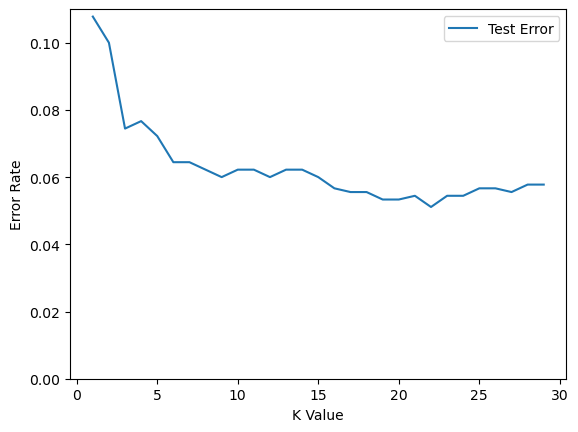

In [48]:
plt.plot(range(1,30),test_error_rates,label='Test Error')
plt.legend()
plt.ylabel('Error Rate')
plt.xlabel("K Value")
plt.ylim(0,0.11)

In [49]:
#pipline --> GridSearchCV

In [52]:
scaler = StandardScaler()

In [53]:
knn = KNeighborsClassifier()

In [54]:
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [55]:
operations = [('scaler', scaler), ('knn', knn)]

In [56]:
from sklearn.pipeline import Pipeline

In [57]:
pipe = Pipeline(operations)

In [58]:
from sklearn.model_selection import GridSearchCV

In [59]:
k_values = list(range(1,20))

In [60]:
k_values

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [63]:
param_grid = {'knn__n_neighbors':k_values}

In [64]:
full_cv_classifier = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy')

In [65]:
full_cv_classifier.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy')

In [66]:
full_cv_classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=14))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=14),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 14,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [68]:
full_pred = full_cv_classifier.predict(X_test)

In [69]:
print(classification_report(y_test, full_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       470
           1       0.95      0.92      0.93       430

    accuracy                           0.94       900
   macro avg       0.94      0.94      0.94       900
weighted avg       0.94      0.94      0.94       900



In [70]:
new_patient = [[3.8, 6.4]]

In [71]:
full_cv_classifier.predict(new_patient)

array([0], dtype=int64)

In [72]:
full_cv_classifier.predict_proba(new_patient)

array([[1., 0.]])